<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/02_Resumo_frequ%C3%AAncias_e_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [1]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importação dos dados

In [2]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cria um dataframe para receber os dados do arquivo CSV.
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/dados.csv')

# Classificação dos dados por tipo

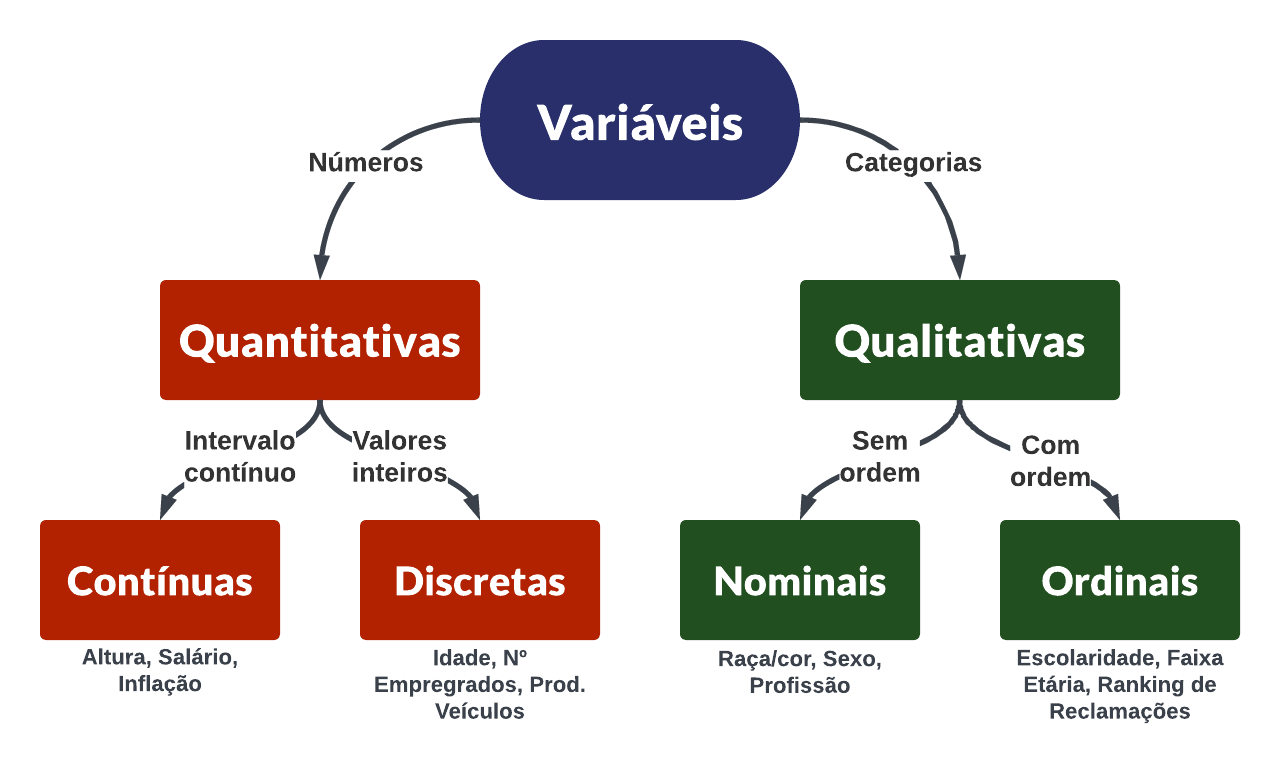

In [4]:
# Classifica os valores únicos.
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Quantidade e perncentual, dados qualitativos

In [5]:
# Quantidade mulheres e homens.
dados.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [6]:
# Percentual de mulheres e homens.
dados.Sexo.value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

# Distribuição de frequência, dados qualitativos

In [7]:
# Cria uma tabela de frequência cruzada de gênero por cor.
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [8]:
# Cria uma tabela de frequência cruzada do percentual sexo e cor.
# Adiciona função de agregação com as médias dos valores de renda.
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual

Cor,0,2,4,6,8
Sexo,,,,,
0,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
1,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


# Distribuição de frequência, dados quantitativos (classes personalizadas)

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [9]:
# Mostra o menor valor existente na coluna renda.
dados.Renda.min()

0

In [10]:
# Mostra o maior valor existente na coluna renda.
dados.Renda.max()

200000

In [11]:
# Cria uma variável que recebe uma lista com os valores limites entre as classes.
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [12]:
# Cria uma variável que recebe uma lista com os nomes das classes.
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

In [13]:
# O método recebe como parâmetro x a coluna renda, bins a variável classe, assim como labels criada acima.
# Por default, este método não inclui a classe inferior, sendo necessário inseri-lo de fato, pos é relevante para a análise.
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [14]:
# Cria uma variável que recebe os valores de frequência.
# Retorna de forma classificada o número total de vezes que cada valor da coluna renda aparece.
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [15]:
# Cria uma variável que recebe os valores de percentual.
# Retorna de forma classificada o percentual de vezes que cada valor da coluna renda aparece.
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True), normalize = True
)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [16]:
# Cria um dataframe para receber os valores de frequencia e percentual.
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia ,'Porcentagem(%)' : percentual})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem(%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [17]:
# Classifica o dataframe pelo index da classe de forma ascendente.
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


# Distribuição de frequência, dados quantitativos (classes de amplitude fixa)

In [18]:
# Especifica que a variável irá receber o número de linhas, elemento 0.
n = dados.shape[0]
n

76840

In [19]:
# Cria uma variável para receber o valor da função matemática de amplitude fixa.
# A função np.log10 calcula o log na base 10.
k = 1+(10/3)*np.log10(n)
k

17.285291187298853

In [20]:
# Cria uma variável que recebe os valores de frequência.
# Retorna de forma classifica o número total de vezes que cada valor da coluna aparece.
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 11,
        include_lowest = True
    ), sort = False
)
frequencia

(-200.001, 18181.818]       76398
(18181.818, 36363.636]        388
(36363.636, 54545.455]         32
(54545.455, 72727.273]          7
(72727.273, 90909.091]          5
(90909.091, 109090.909]         6
(109090.909, 127272.727]        1
(127272.727, 145454.545]        0
(145454.545, 163636.364]        0
(163636.364, 181818.182]        0
(181818.182, 200000.0]          3
Name: Renda, dtype: int64

In [21]:
# Cria uma variável que recebe os valores de percentual.
# Retorna de forma classifica o percentual de vezes que cada valor da coluna aparece.
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 11,
        include_lowest = True
    ), sort = False,
    normalize = True
)*100
percentual

(-200.001, 18181.818]       99.424779
(18181.818, 36363.636]       0.504945
(36363.636, 54545.455]       0.041645
(54545.455, 72727.273]       0.009110
(72727.273, 90909.091]       0.006507
(90909.091, 109090.909]      0.007808
(109090.909, 127272.727]     0.001301
(127272.727, 145454.545]     0.000000
(145454.545, 163636.364]     0.000000
(163636.364, 181818.182]     0.000000
(181818.182, 200000.0]       0.003904
Name: Renda, dtype: float64

In [22]:
# Cria um dataframe para receber os valores de frequencia e percentual.
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia ,'Porcentagem(%)' : percentual})
dist_freq_quantitativas

,Frequência,Porcentagem(%)
"(-200.001, 18181.818]",76398,99.424779
"(18181.818, 36363.636]",388,0.504945
"(36363.636, 54545.455]",32,0.041645
"(54545.455, 72727.273]",7,0.009110
"(72727.273, 90909.091]",5,0.006507
"(90909.091, 109090.909]",6,0.007808
"(109090.909, 127272.727]",1,0.001301
"(127272.727, 145454.545]",0,0.000000
"(145454.545, 163636.364]",0,0.000000
"(163636.364, 181818.182]",0,0.000000


# Medidas de tendências centrais

## Média aritmética

In [23]:
# Calcula a média da variável renda.
dados.Renda.mean()

2000.3831988547631

## Mediana

In [24]:
# Calcula a mediana da variável renda.
dados.Renda.median()

1200.0

## Moda

In [25]:
# Calcula a moda da variável renda.
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

## Relação entre média, mediana e moda

In [26]:
# Verifica se realmente os valores de moda, mediana e média descrevem uma assimétria à direita.
# Moda < Mediana < Media

# Verifica se realmente os valores de moda, mediana e média descrevem uma simétria.
# Moda = Mediana = Media

# Medidas separatrizes

## Quartis

In [27]:
# Para dividir uma série em "n" partes, subtraímos de "n - 1" para obter os divisores.
# Por exemplo, para calcular os quartis, precisaremos de três valores;
# Calcula o quartis da variável, passando como parâmetros uma lista com a divisão.
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

## Decis

In [28]:
# Calcula o decis da variável renda, utilizando a construção de lista com 9 elementos, como parâmetro do método quantile().
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

## Percentis

In [29]:
# Calcula o percentil da variável renda, utilizando a construção de lista com 99 elementos, como parâmetro do método quantile().
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

# Medidas de dispersão

## Desvio médio absouto

In [30]:
# Calcula o desvio médio absoluto utilizando o método mad().
dados.Renda.mad()

<ipython-input-30-3d0dede1a029>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

In [31]:
# Calcula o desvio absoluto de outra forma, pois o método mad() será removido no futuro.
(dados.Renda - dados.Renda.mean()).abs().mean()

1526.4951371638058

## Variância

In [32]:
# Calcula a variância utilizando o método var().
dados.Renda.var()

11044906.006217021

## Desvio padrão

In [33]:
# Calcula o desvio padrão do data frame.
dados.Renda.std()

3323.3877303464037